In [5]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [7]:
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [8]:
y_train = y_train.reshape(-1,1)
y_test = y_test.reshape(-1,1)

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [11]:
cnn = models.Sequential([
    layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

In [14]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics=['accuracy'])

In [15]:
cnn.fit(X_train,y_train,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 68s 43ms/step - loss: 1.4708 - accuracy: 0.4719
Epoch 2/10
1563/1563 [==============================] - 67s 43ms/step - loss: 1.1041 - accuracy: 0.6141
Epoch 3/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.9674 - accuracy: 0.6648
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8825 - accuracy: 0.6953
Epoch 5/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.8154 - accuracy: 0.7155
Epoch 6/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.7600 - accuracy: 0.7365
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7083 - accuracy: 0.7531
Epoch 8/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6698 - accuracy: 0.7662
Epoch 9/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.6229 - accuracy: 0.7832
Epoch 10/10
1563/1563 [==============================] - 65s 41m

In [16]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 14ms/step - loss: 0.9451 - accuracy: 0.6932


[0.9451115131378174, 0.6931999921798706]

In [19]:
y_pred = cnn.predict(X_test)
index = np.argmax(y_pred[5])
y_test[index]

array([1], dtype=uint8)

'frog'

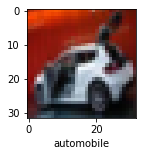

In [20]:
plt.figure(figsize = (15,2))
plt.imshow(X_test[index])
plt.xlabel(classes[y_test[index][0]])
classes[index]